In [1]:
data <- read.csv("new_chr9_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
137337,chr9_3000100,3000000,3,778,1247,63.510204,63.719980
62344,chr9_3000100,3000000,2,388,618,31.673469,31.578947
1,chr9_3000100,3000000,1,59,92,4.816326,4.701073
137338,chr9_3000300,3000200,3,728,1251,50.731707,53.121019
62345,chr9_3000300,3000200,2,546,790,38.048780,33.545648
2,chr9_3000300,3000200,1,161,314,11.219512,13.333333
137339,chr9_3001700,3001600,3,88,142,81.481482,81.142857
62346,chr9_3001700,3001600,2,17,21,15.740741,12.000000
3,chr9_3001700,3001600,1,3,12,2.777778,6.857143
137340,chr9_3002800,3002700,3,13,20,100.000000,100.000000


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
29971,chr9_3000100,3000000,778,388,59
29973,chr9_3000300,3000200,728,546,161
29985,chr9_3001700,3001600,88,17,3
29993,chr9_3002800,3002700,13,0,0
29994,chr9_3003100,3003000,64,5,0
30003,chr9_3004900,3004800,25,6,6
30011,chr9_3005700,3005600,35,8,0
30024,chr9_3006600,3006500,25,4,0
30034,chr9_3007100,3007000,30,15,7
30039,chr9_3007500,3007400,11,21,1


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 80014"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
29971,chr9_3000100,3000000,778,388,59,0
29973,chr9_3000300,3000200,728,546,161,200
29985,chr9_3001700,3001600,88,17,3,1400
29993,chr9_3002800,3002700,13,0,0,1100
29994,chr9_3003100,3003000,64,5,0,300
30003,chr9_3004900,3004800,25,6,6,1800
30011,chr9_3005700,3005600,35,8,0,800
30024,chr9_3006600,3006500,25,4,0,900
30034,chr9_3007100,3007000,30,15,7,500
30039,chr9_3007500,3007400,11,21,1,400


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
29971,chr9_3000100,3000000,778,388,59,0
30069,chr9_3011600,3011500,82,18,0,100
30114,chr9_3017000,3016900,23,2,5,100
30130,chr9_3019000,3018900,37,19,1,100
30134,chr9_3019600,3019500,11,0,0,100
30139,chr9_3020400,3020300,17,4,0,100


,binID,start,high,medium,low,dist
30069,chr9_3011600,3011500,82,18,0,100
30114,chr9_3017000,3016900,23,2,5,100
30130,chr9_3019000,3018900,37,19,1,100
30134,chr9_3019600,3019500,11,0,0,100
30139,chr9_3020400,3020300,17,4,0,100
30155,chr9_3022900,3022800,6,9,0,100


[1] 10853

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3011400   3011500   3016800   3016900   3018800   3018900   3019400
    [8]   3019500   3020200   3020300   3022700   3022800   3025000   3025100
   [15]   3025200   3026800   3026900   3027200   3027300   3027400   3030600
   [22]   3030700   3036200   3036300   3049000   3049100   3082800   3082900
   [29]   3083700   3083800   3090000   3090100   3090600   3090700   3116600
   [36]   3116700   3126300   3126400   3128300   3128400   3141500   3141600
   [43]   3142700   3142800   3142900   3143000   3143100   3143500   3143600
   [50]   3165900   3166000   3175000   3175100   3237400   3237500   3237600
   [57]   3237700   3237800   3249900   3250000   3273100   3273200   3273300
   [64]   3278900   3279000   3315900   3316000   3321000   3321100   3336100
   [71]   3336200   3375600   3375700   3379200   3379300   3394200   3394300
   [78]   3394800   3394900   3403900   3404000   3404100   3404400   3404500
   [85]   3407600   3407700   3429600   3429700   3457400   3457500   3465100
   [92]   3465200   3466300   3466400   3491600   3491700   3492100   3492200
   [99]   3492300   3492600   3492700   3527500   3527600   3547300   3547400
  [106]   3653800   3653900   3654800   3654900   3679400   3679500   3690900
  [113]   3691000   3699200   3699300   3700200   3700300   3743600   3743700
  [120]   3800100   3800200   3807800   3807900   3821500   3821600   3828100
  [127]   3828200   3878800   3878900   3883800   3883900   3900700   3900800
  [134]   3941400   3941500   3941700   3941800   3941900   3942300   3942400
  [141]   3943400   3943500   3944200   3944300   3944400   3946400   3946500
  [148]   3947200   3947300   3947400   3948300   3948400   3948500   3951100
  [155]   3951200   3951700   3951800   3955900   3956000   3956900   3957000
  [162]   3965400   3965500   3969800   3969900   4055600   4055700   4072900
  [169]   4073000   4075200   4075300   4075400   4075500   4076300   4076400
  [176]   4080000   4080100   4103000   4103100   4108400   4108500   4108600
  [183]   4108700   4138500   4138600   4139100   4139200   4139300   4139400
  [190]   4139500   4139600   4140800   4140900   4141000   4141100   4141500
  [197]   4141600   4142000   4142100   4142700   4142800   4142900   4143000
  [204]   4155800   4155900   4156100   4156200   4156300   4156400   4166700
  [211]   4166800   4167800   4167900   4207200   4207300   4222200   4222300
  [218]   4222400   4238300   4238400   4238900   4239000   4239100   4239200
  [225]   4240300   4240400   4240500   4241000   4241100   4245000   4245100
  [232]   4245200   4249600   4249700   4259200   4259300   4259400   4259500
  [239]   4259600   4259900   4260000   4263700   4263800   4263900   4264300
  [246]   4264400   4266200   4266300   4266400   4286200   4286300   4308800
  [253]   4308900   4309500   4309600   4309700   4359800   4359900   4364300
  [260]   4364400   4375300   4375400   4391100   4391200   4401100   4401200
  [267]   4404100   4404200   4404300   4405200   4405300   4406300   4406400
  [274]   4420100   4420200   4424300   4424400   4424500   4426900   4427000
  [281]   4427100   4427200   4432700   4432800   4471100   4471200   4492300
  [288]   4492400   4493500   4493600   4498100   4498200   4681200   4681300
  [295]   4740900   4741000   4771400   4771500   4848500   4848600   4848800
  [302]   4848900   4849000   4849100   4850700   4850800   4854100   4854200
  [309]   4854500   4854600   4854700   4854800   4854900   4855000   4855100
  [316]   4858100   4858200   4858900   4859000   4859400   4859500   4871800
  [323]   4871900   4896800   4896900   4917300   4917400   4958900   4959000
  [330]   5033200   5033300   5033400   5039300   5039400   5057600   5057700
  [337]   5057800   5063100   5063200   5063300   5063400   5063500   5063700
  [344]   5063800   5063900   5066200   5066300   5068000   5068100   5068200
  [351]   5072800   5072900   5076000   5076100   5179600   5179700   5209200
  [358]   5209300   521230

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
30068,chr9_3011500,3011400,24,0,0
30069,chr9_3011600,3011500,82,18,0
30113,chr9_3016900,3016800,8,12,0
30114,chr9_3017000,3016900,23,2,5
30128,chr9_3018900,3018800,11,0,0
30130,chr9_3019000,3018900,37,19,1
30133,chr9_3019500,3019400,15,17,0
30134,chr9_3019600,3019500,11,0,0
30138,chr9_3020300,3020200,73,26,11
30139,chr9_3020400,3020300,17,4,0


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
30069,chr9_3011600,3011500,0.0541811129083427
30113,chr9_3016900,3016800,0
30114,chr9_3017000,3016900,0.000115877144096246
30128,chr9_3018900,3018800,0
30130,chr9_3019000,3018900,0.0649642520617711
30133,chr9_3019500,3019400,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
30069,chr9_3011600,3011500,0.0541811129083427
30130,chr9_3019000,3018900,0.0649642520617711
30139,chr9_3020400,3020300,0.245563050665172
30172,chr9_3025300,3025200,0.632674206129144
30183,chr9_3027000,3026900,0.999999999999999
30572,chr9_3083900,3083800,0.646824190840589


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3011400   3011500   3018800   3018900   3020200   3020300   3025100
   [8]   3025200   3026800   3026900   3083700   3083800   3090000   3090100
  [15]   3128300   3128400   3142800   3142900   3143000   3143100   3175000
  [22]   3175100   3237400   3237500   3278900   3279000   3315900   3316000
  [29]   3321000   3321100   3404400   3404500   3429600   3429700   3457400
  [36]   3457500   3465100   3465200   3492100   3492200   3492300   3492600
  [43]   3492700   3527500   3527600   3653800   3653900   3690900   3691000
  [50]   3699200   3699300   3700200   3700300   3743600   3743700   3800100
  [57]   3800200   3878800   3878900   3883800   3883900   3900700   3900800
  [64]   3941700   3941800   3941900   3942300   3942400   3943400   3943500
  [71]   3946400   3946500   3947200   3947300   3947400   3948300   3948400
  [78]   3956900   3957000   3969800   3969900   4075200   4075300   4080000
  [85]   4080100   4108400   4108500   4108600   4108700   4139200   4139300
  [92]   4139500   4139600   4141500   4141600   4142000   4142100   4142700
  [99]   4142800   4155800   4155900   4156300   4156400   4167800   4167900
 [106]   4238300   4238400   4238900   4239000   4239100   4239200   4240300
 [113]   4240400   4241000   4241100   4245000   4245100   4245200   4259300
 [120]   4259400   4259500   4259600   4263700   4263800   4264300   4264400
 [127]   4266200   4266300   4266400   4359800   4359900   4364300   4364400
 [134]   4375300   4375400   4391100   4391200   4405200   4405300   4406300
 [141]   4406400   4424300   4424400   4426900   4427000   4492300   4492400
 [148]   4498100   4498200   4681200   4681300   4848800   4848900   4849000
 [155]   4849100   4854100   4854200   4854900   4855000   4855100   4858900
 [162]   4859000   4871800   4871900   4896800   4896900   5033200   5033300
 [169]   5033400   5039300   5039400   5057600   5057700   5057800   5063100
 [176]   5063200   5179600   5179700   5209200   5209300   5215000   5215100
 [183]   5250600   5250700   5415900   5416000   5446600   5446700   5475000
 [190]   5475100   5554100   5554200   5554300   5554500   5554600   5554900
 [197]   5555000   5644500   5644600   5690800   5690900   5691000   5749800
 [204]   5749900   5893600   5893700   5925700   5925800   5925900   5926000
 [211]   5934600   5934700   5934800   5934900   5935300   5935400   5935500
 [218]   6131200   6131300   6131800   6131900   6132000   6133500   6133600
 [225]   6442600   6442700   6442800   6442900   6513700   6513800   6584800
 [232]   6584900   6649500   6649600   6663200   6663300   6668300   6668400
 [239]   6699000   6699100   6699500   6699600   6747300   6747400   6748800
 [246]   6748900   6805600   6805700   6805800   6807200   6807300   6808100
 [253]   6808200   6808300   6808500   6808600   6808700   6808800   6810000
 [260]   6810100   6810300   6810400   6810500   6811200   6811300   6811400
 [267]   6816800   6816900   6879000   6879100   6967100   6967200   6976200
 [274]   6976300   6978700   6978800   6979600   6979700   7037600   7037700
 [281]   7064400   7064500   7102600   7102700   7118800   7118900   7175200
 [288]   7175300   7204000   7204100   7209500   7209600   7299100   7299200
 [295]   7300600   7300700   7391200   7391300   7407400   7407500   7409100
 [302]   7409200   7410900   7411000   7413200   7413300   7415600   7415700
 [309]   7427700   7427800   7468400   7468500   7477800   7477900   7490800
 [316]   7490900   7494800   7494900   7496200   7496300   7506200   7506300
 [323]   7612500   7612600   7618700   7618800   7647000   7647100   7751800
 [330]   7751900   7752700   7752800   7783900   7784000   7787700   7787800
 [337]   7798900   7799000   7799900   7800000   7800500   7800600   7800700
 [344]   7854500   7854600   7935100   7935200   7938700   7938800   8044300
 [351]   8044400   8050300   8050400   8060800   8060900   8217800   8217900
 [358]   8234700   8234800   8237300   8237400   8282500   8282600   8363800

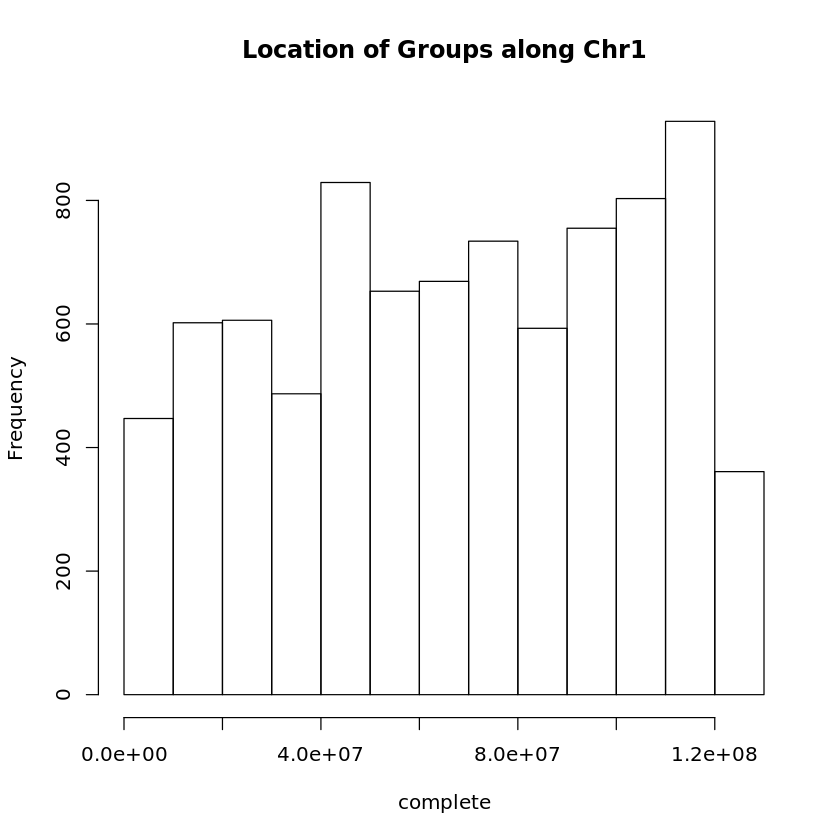

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
30068,chr9_3011500,3011400,24,0,0
30069,chr9_3011600,3011500,82,18,0
30128,chr9_3018900,3018800,11,0,0
30130,chr9_3019000,3018900,37,19,1
30138,chr9_3020300,3020200,73,26,11
30139,chr9_3020400,3020300,17,4,0
30170,chr9_3025200,3025100,33,20,4
30172,chr9_3025300,3025200,9,9,1
30182,chr9_3026900,3026800,31,3,0
30183,chr9_3027000,3026900,15,1,0


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 8467"

In [16]:
library(ggplot2)

In [ ]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [ ]:
part[20:60,]

In [ ]:
head(part)
tail(part)

In [ ]:
write.csv(part, "chr9_A_group.csv")

In [ ]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [ ]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [ ]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [ ]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [ ]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [ ]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [ ]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [ ]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [ ]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")